In [40]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [41]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count += len(files)

print("Image folder has " + str(count) + " Images")

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Image folder has 4317 Images


In [42]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [43]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size, img_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size, img_size)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [44]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

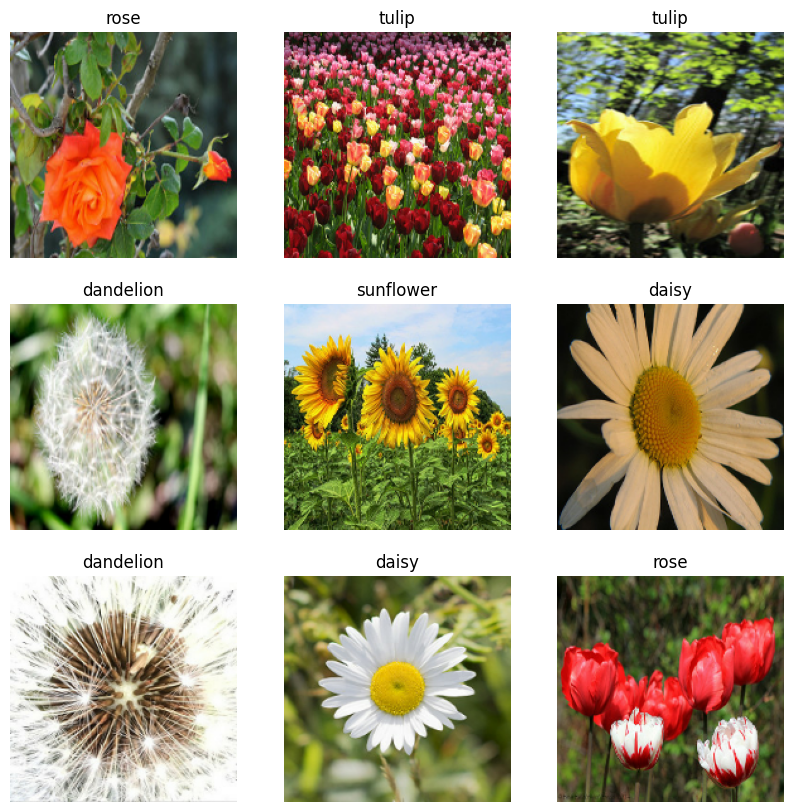

In [45]:
i = 0
plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [60]:
AUTOTUNE = tf.data.AUTOTUNE

In [61]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [57]:
#Data Augmentation

In [66]:
from tensorflow.keras import layers, Sequential, Input

data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


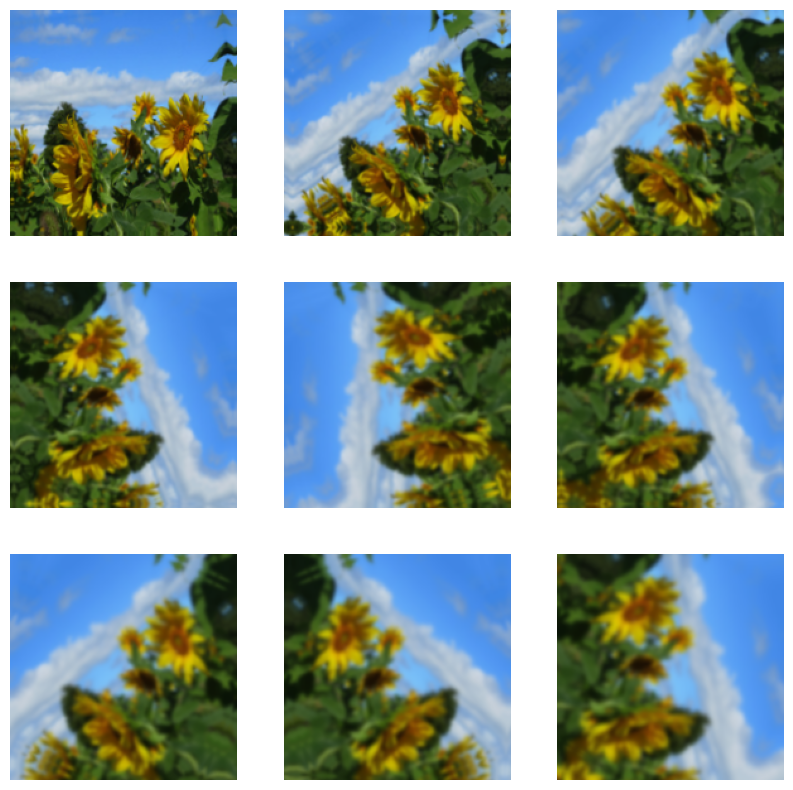

In [68]:
i = 0
plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [71]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding = 'same', activation= 'relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation= 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation= 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [73]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)    

In [74]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = model.fit(train_ds, epochs = 15, validation_data = val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 711ms/step - accuracy: 0.2744 - loss: 1.8309 - val_accuracy: 0.4983 - val_loss: 1.1744
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 711ms/step - accuracy: 0.5268 - loss: 1.1537 - val_accuracy: 0.5562 - val_loss: 1.0526
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 655ms/step - accuracy: 0.5876 - loss: 1.0039 - val_accuracy: 0.6176 - val_loss: 1.0238
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 71s 662ms/step - accuracy: 0.6308 - loss: 0.9381 - val_accuracy: 0.6222 - val_loss: 0.9286
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 704ms/step - accuracy: 0.6723 - loss: 0.8629 - val_accuracy: 0.6327 - val_loss: 0.9196
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 72s 663ms/step - accuracy: 0.6541 - loss: 0.8941 - val_accuracy: 0.6524 - val_loss: 0.8685
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 705ms/step - accuracy: 0.6885 - loss: 0.8140 - val_accuracy: 0.6732 - val_loss: 0.8736
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 690ms/step - accuracy: 0.6942 - loss: 0

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])

    # Display the image
    plt.imshow(input_image)
    plt.axis('off')  # Optional: to hide axis ticks
    plt.show()

    outcome = 'Image belongs to ' + flower_names[np.argmax(result)] + \
              ' with score of ' + str(np.max(result) * 100) + '%'
    return outcome

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


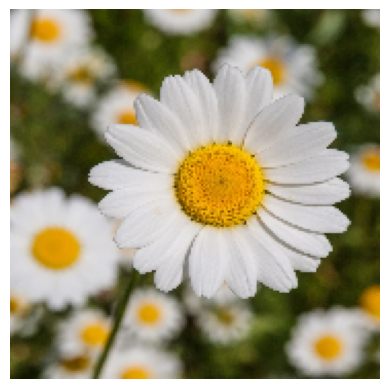

'Image belongs to daisy with score of 99.99911%'

In [82]:
classify_images('Sample/01.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


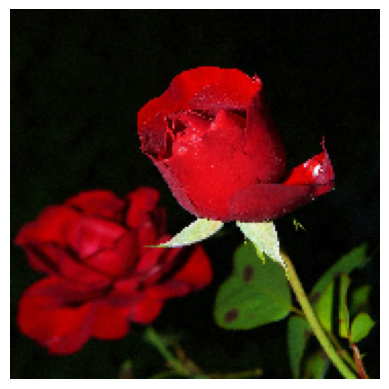

'Image belongs to rose with score of 95.12444%'

In [84]:
classify_images('Sample/03.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


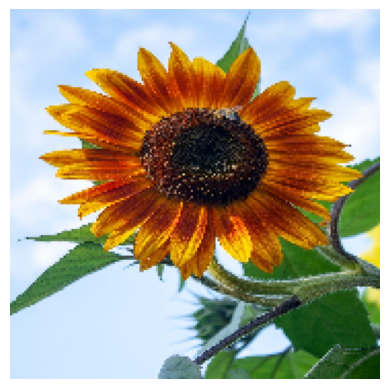

'Image belongs to sunflower with score of 99.24545%'

In [85]:
classify_images('Sample/04.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


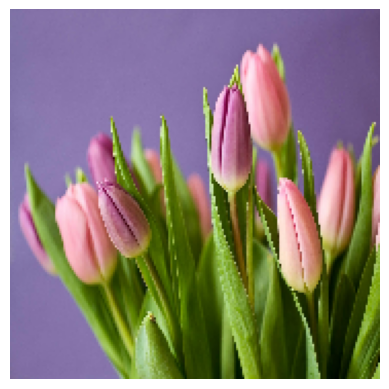

'Image belongs to tulip with score of 92.03562%'

In [86]:
classify_images('Sample/05.jpg')